# The Sparks Foundation

## Task 1 - Prediction using Supervised ML

To Predict the percentage of marks of the students based on the number of hours they studied

### By - GURRAM RAJINI

#### Selection: #GRIPJULY21
#### Submission : #GRIPAUGUST21

In [135]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

#### Importing the dataset

In [134]:
data = pd.read_excel ('GRIP_Student_data.xlsx')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
## Finding shape of the data
data.shape

(25, 2)

In [11]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


 ###### We can see that no null values and the variables in dataset are numerical

In [18]:
## Descriptive analysis of data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data Visualization
#### Bivariate Analysis

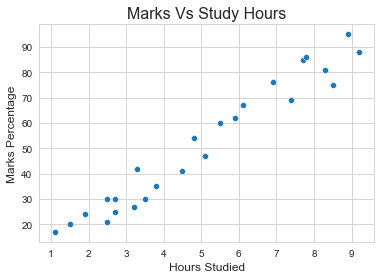

In [13]:
sns.set_style('whitegrid')
sns.scatterplot(y= 'Scores', x= 'Hours', data = data)
plt.title('Marks Vs Study Hours',size=16)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

<AxesSubplot:>

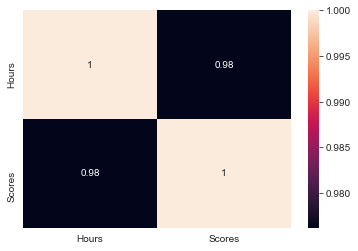

In [136]:
corr = data.corr()
sns.heatmap(corr, annot= True)

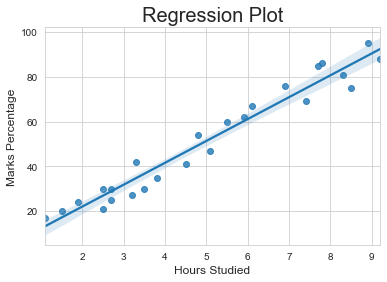

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [137]:
## Regression plot used to get the relation between datapoints

sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(corr)

###### From above plots we can that predictor and response variables are linear and highly positive correlated (97%) to each other

### Univariate analysis

<AxesSubplot:xlabel='Hours', ylabel='Density'>

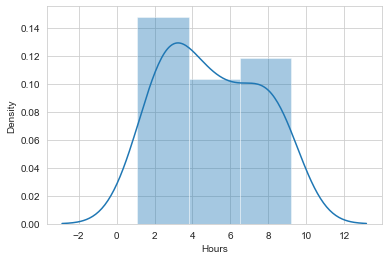

In [23]:
sns.distplot(data.Hours)   ## Hour feature is almost normal 

<AxesSubplot:xlabel='Scores', ylabel='Density'>

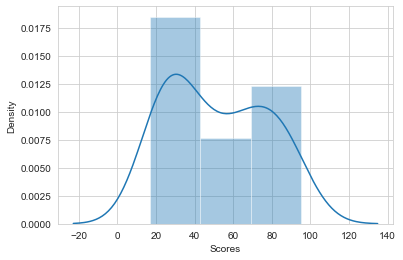

In [17]:
sns.distplot(data.Scores) ## this is also normal

<AxesSubplot:xlabel='Hours'>

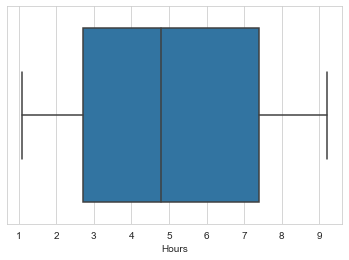

In [31]:
sns.boxplot(data.Hours)   ## No outliers

<AxesSubplot:xlabel='Scores'>

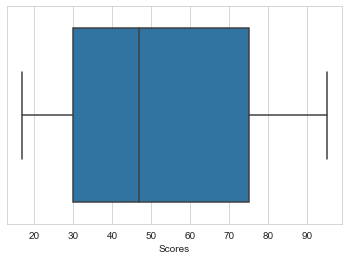

In [32]:
sns.boxplot(data.Scores)  ## No outliers

#### From above univariate plots we can say the features are normally distributed with no outliers. So there is no need of applying further transformation techniques on data

### Splitting the data

In [52]:
# Defining X and y from the Data
X = data.iloc[:, 0].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [56]:
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((18,), (7,), (18,), (7,))

### Building Linear Regression model

In [64]:
train_X = train_X.reshape(-1, 1)
val_X = val_X.reshape(-1,1)

In [59]:
## MOdel building
model = LinearRegression()

## Fitting the data into model
model.fit(train_X, train_y)

LinearRegression()

#### Predicting the percentage of marks using hours studies

In [65]:
pred_y = model.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


### Comparing Actual value and predicted values

In [138]:
df = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
df

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## Model Evaluation

In [139]:
# Calculating the accuracy of the model using different metrics

print('Mean absolute error: ', mean_absolute_error(val_y,pred_y))
print('Mean Squared Error:', mean_squared_error(val_y, pred_y))
print('RMSE:', np.sqrt(mean_squared_error(val_y, pred_y)))

Mean absolute error:  4.130879918502486
Mean Squared Error: 20.33292367497997
RMSE: 4.5092043283688055


### Prediction of new data points using LR model built

In [145]:
new_data = pd.Series([8.9,5.1,6.0,7.8])
array = np.array(new_data).reshape(-1,1)
dataframe = pd.DataFrame(new_data, columns = ['Hours'])
dataframe
prediction_new = model.predict(array)
dataframe['Predicted_Scores'] = prediction_new

In [146]:
dataframe  

,Hours,Predicted_Scores
0,8.9,90.413141
1,5.1,52.634764
2,6.0,61.582274
3,7.8,79.477295


##### According to this regression model if a student studies for 8.9 hours a day he/she is likely to score 90.4 marks.

                                ####  THANK YOU  ###